### Anomaly detection by Random Forest Classifier

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive
import matplotlib.pyplot as plt
# Import necessary library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Mounting Google Drive to access data
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv')

In [ ]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

date_time            0
duration             0
source_ip            0
destination_ip       0
source_port          0
destination_port     0
protocol             0
flag                 0
forwarding_status    0
tos                  0
packets              0
bytes                0
label                0
dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv')

# Define a function to convert IP addresses to numerical values
def ip_to_numeric(ip):
    parts = ip.split('.')
    return sum(int(part) * (256 ** (3 - i)) for i, part in enumerate(parts))

# Convert IP addresses to numerical format in the dataset
data['source_ip'] = data['source_ip'].apply(ip_to_numeric)
data['destination_ip'] = data['destination_ip'].apply(ip_to_numeric)

# Feature selection
selected_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'tos', 'packets', 'bytes']
target_column = 'label'  # Change 'label' to the actual name of the target column in your dataset

# Separate features and target
X = data[selected_features]
y = data[target_column]

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for training your model.


### **Anomaly detection with RF RandomForestClassifier:**

In [ ]:
import pandas as pd
import struct
import socket
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Function to convert IP addresses from string to integer
def ip_to_int(ip):
    # Convert IP address from string to binary format
    packed_ip = socket.inet_aton(ip)
    # Unpack binary IP and return as integer
    return struct.unpack("!I", packed_ip)[0]

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv')

# Apply IP conversion function to 'source_ip' and 'destination_ip'
data['source_ip'] = data['source_ip'].apply(ip_to_int)
data['destination_ip'] = data['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Initialize mappings dictionary
mappings = {}

# Perform label encoding for categorical features and store mappings
for feature in categorical_features:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    # Fit and transform the feature
    data[feature] = label_encoder.fit_transform(data[feature])
    # Store the mapping for later use
    mappings[feature] = {label: index for index, label in enumerate(label_encoder.classes_)}

# Save mappings to a text file
with open("mappings.txt", "w") as f:
    for feature, mapping in mappings.items():
        f.write(f"Encoding for {feature}: {mapping}\n")

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'forwarding_status', 'tos', 'packets', 'bytes']

# Split data into features and target
X = data[numerical_features + categorical_features]
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Define the new sample
new_sample = {
    'duration': 0.584,
    'source_ip': '193.27.6.136',
    'destination_ip': '42.219.156.212',
    'source_port': 25,
    'destination_port': 57784,
    'forwarding_status': 0,
    'tos': 0,
    'packets': 5,
    'bytes': 958,
    'protocol': 'TCP',
    'flag': '.AP.SF'
}

# Convert IP addresses to integers
new_sample['source_ip'] = ip_to_int(new_sample['source_ip'])
new_sample['destination_ip'] = ip_to_int(new_sample['destination_ip'])

# Encode categorical features
for feature in categorical_features:
    new_sample[feature] = mappings[feature].get(new_sample[feature], -1)

# Create a DataFrame for the new sample
new_sample_df = pd.DataFrame([new_sample])

# Scale numerical features
new_sample_df[numerical_features] = scaler.transform(new_sample_df[numerical_features])

# Make predictions on the new sample
new_sample_pred = model.predict(new_sample_df)

# Print the prediction
print("Prediction for the new sample:", new_sample_pred)


Accuracy: 0.9587
              precision    recall  f1-score   support

anomaly-spam       0.99      1.00      1.00       959
  background       0.95      0.97      0.96      3084
   blacklist       0.84      0.79      0.82       623
         dos       1.00      1.00      1.00       785
 nerisbotnet       0.98      0.95      0.97       308
      scan11       1.00      0.88      0.94        77
      scan44       0.98      1.00      0.99       358

    accuracy                           0.96      6194
   macro avg       0.96      0.94      0.95      6194
weighted avg       0.96      0.96      0.96      6194

Prediction for the new sample: ['anomaly-spam']


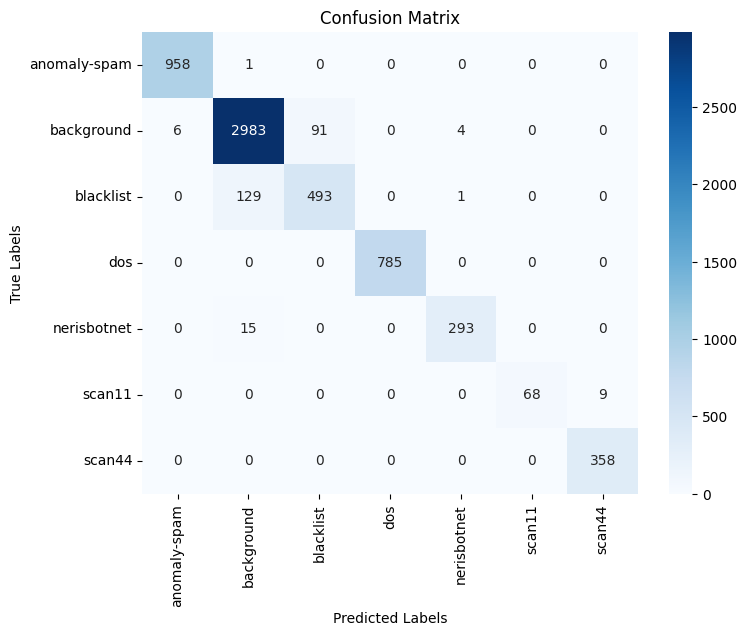

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### **Anomaly detection with sequential neural network architecture  :**

The neural network model here is a multi-class classification model. It uses a sequential neural network architecture (defined using the Sequential class) to classify the input data into one of several possible classes. The model consists of several fully connected (dense) layers with activation functions (relu in hidden layers and softmax in the output layer) and dropout layers for regularization.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a function to convert IP addresses from dot-decimal notation to integers
def ip_to_int(ip):
    parts = ip.split('.')
    return (int(parts[0]) * 256**3) + (int(parts[1]) * 256**2) + (int(parts[2]) * 256) + int(parts[3])

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv')

# Apply IP conversion function to 'source_ip' and 'destination_ip'
data['source_ip'] = data['source_ip'].apply(ip_to_int)
data['destination_ip'] = data['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'forwarding_status', 'tos', 'packets', 'bytes']

# Split data into features and target
X = data[numerical_features + categorical_features]
y = data['label']

# Define the encoder for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_encoded = encoder.transform(X_test[categorical_features]).toarray()

# Combine scaled numerical features with encoded categorical features
X_train_processed = np.concatenate((X_train[numerical_features].values, X_train_encoded), axis=1)
X_test_processed = np.concatenate((X_test[numerical_features].values, X_test_encoded), axis=1)

# Define the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train_processed.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(data['label'])), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_processed, y_train, epochs=5, batch_size=32, validation_data=(X_test_processed, y_test))

# Define the new sample
new_sample = {
    'duration': 0.584,
    'source_ip': '193.27.6.136',
    'destination_ip': '42.219.156.212',
    'source_port': 25,
    'destination_port': 57784,
    'forwarding_status': 0,
    'tos': 0,
    'packets': 5,
    'bytes': 958,
    'protocol': 'TCP',
    'flag': '.AP.SF'
}

# Convert new sample to a DataFrame
new_sample_df = pd.DataFrame([new_sample])

# Apply IP conversion function to 'source_ip' and 'destination_ip'
new_sample_df['source_ip'] = new_sample_df['source_ip'].apply(ip_to_int)
new_sample_df['destination_ip'] = new_sample_df['destination_ip'].apply(ip_to_int)

# Scale numerical features
new_sample_df[numerical_features] = scaler.transform(new_sample_df[numerical_features])

# One-hot encode categorical features
new_sample_encoded = encoder.transform(new_sample_df[categorical_features]).toarray()

# Combine scaled numerical features with encoded categorical features
new_sample_processed = np.concatenate((new_sample_df[numerical_features].values, new_sample_encoded), axis=1)

# Predict the class of the new sample
# Predict the probabilities of each class for the new sample
predicted_probabilities = model.predict(new_sample_processed)

# Determine the class label with the highest probability
predicted_class_label_index = np.argmax(predicted_probabilities)
predicted_class_label = label_encoder.inverse_transform([predicted_class_label_index])[0]

print(f"Predicted class label: {predicted_class_label}")


Epoch 1/5
775/775 [==============================] - 6s 5ms/step - loss: 0.6675 - accuracy: 0.7762 - val_loss: 0.4547 - val_accuracy: 0.8321
Epoch 2/5
775/775 [==============================] - 3s 4ms/step - loss: 0.4820 - accuracy: 0.8265 - val_loss: 0.4223 - val_accuracy: 0.8323
Epoch 3/5
775/775 [==============================] - 3s 4ms/step - loss: 0.4515 - accuracy: 0.8319 - val_loss: 0.4029 - val_accuracy: 0.8439
Epoch 4/5
775/775 [==============================] - 3s 4ms/step - loss: 0.4296 - accuracy: 0.8384 - val_loss: 0.3940 - val_accuracy: 0.8423
Epoch 5/5
1/1 [==============================] - 0s 111ms/step
Predicted class label: anomaly-spam


Epoch 1/5
775/775 [==============================] - 5s 5ms/step - loss: 0.6589 - accuracy: 0.7745 - val_loss: 0.4501 - val_accuracy: 0.8318
Epoch 2/5
775/775 [==============================] - 3s 4ms/step - loss: 0.4821 - accuracy: 0.8266 - val_loss: 0.4147 - val_accuracy: 0.8437
Epoch 3/5
775/775 [==============================] - 3s 4ms/step - loss: 0.4478 - accuracy: 0.8353 - val_loss: 0.4057 - val_accuracy: 0.8395
Epoch 4/5
775/775 [==============================] - 3s 4ms/step - loss: 0.4307 - accuracy: 0.8403 - val_loss: 0.3981 - val_accuracy: 0.8428
Epoch 5/5
1/1 [==============================] - 0s 87ms/step
Predicted class label: anomaly-spam
Accuracy: 0.8457
194/194 [==============================] - 0s 2ms/step


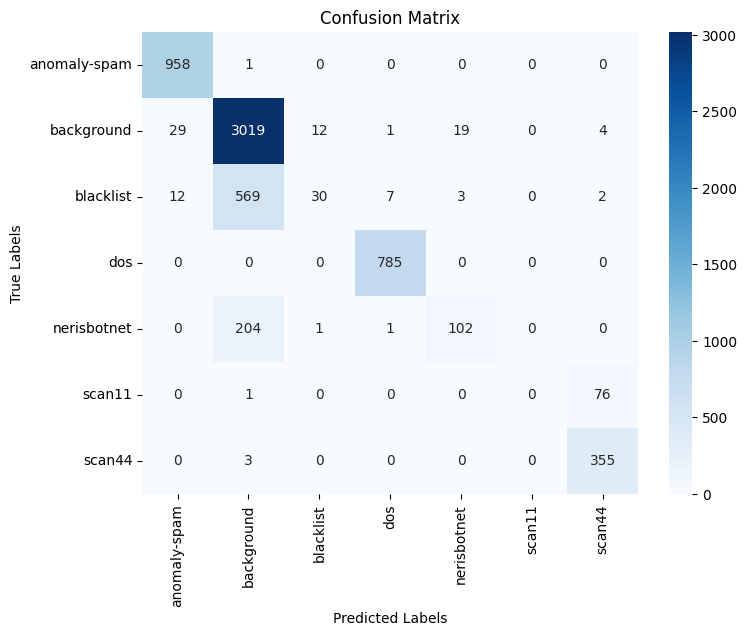

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a function to convert IP addresses from dot-decimal notation to integers
def ip_to_int(ip):
    parts = ip.split('.')
    return (int(parts[0]) * 256**3) + (int(parts[1]) * 256**2) + (int(parts[2]) * 256) + int(parts[3])

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv')

# Apply IP conversion function to 'source_ip' and 'destination_ip'
data['source_ip'] = data['source_ip'].apply(ip_to_int)
data['destination_ip'] = data['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'forwarding_status', 'tos', 'packets', 'bytes']

# Split data into features and target
X = data[numerical_features + categorical_features]
y = data['label']

# Define the encoder for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_encoded = encoder.transform(X_test[categorical_features]).toarray()

# Combine scaled numerical features with encoded categorical features
X_train_processed = np.concatenate((X_train[numerical_features].values, X_train_encoded), axis=1)
X_test_processed = np.concatenate((X_test[numerical_features].values, X_test_encoded), axis=1)

# Define the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train_processed.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(data['label'])), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_processed, y_train, epochs=10, batch_size=32, validation_data=(X_test_processed, y_test))

# Define the new sample
new_sample = {
    'duration': 0.584,
    'source_ip': '193.27.6.136',
    'destination_ip': '42.219.156.212',
    'source_port': 25,
    'destination_port': 57784,
    'forwarding_status': 0,
    'tos': 0,
    'packets': 5,
    'bytes': 958,
    'protocol': 'TCP',
    'flag': '.AP.SF'
}

# Convert new sample to a DataFrame
new_sample_df = pd.DataFrame([new_sample])

# Apply IP conversion function to 'source_ip' and 'destination_ip'
new_sample_df['source_ip'] = new_sample_df['source_ip'].apply(ip_to_int)
new_sample_df['destination_ip'] = new_sample_df['destination_ip'].apply(ip_to_int)

# Scale numerical features
new_sample_df[numerical_features] = scaler.transform(new_sample_df[numerical_features])

# One-hot encode categorical features
new_sample_encoded = encoder.transform(new_sample_df[categorical_features]).toarray()

# Combine scaled numerical features with encoded categorical features
new_sample_processed = np.concatenate((new_sample_df[numerical_features].values, new_sample_encoded), axis=1)

# Predict the class of the new sample
# Predict the probabilities of each class for the new sample
predicted_probabilities = model.predict(new_sample_processed)

# Determine the class label with the highest probability
predicted_class_label_index = np.argmax(predicted_probabilities)
predicted_class_label = label_encoder.inverse_transform([predicted_class_label_index])[0]

print(f"Predicted class label: {predicted_class_label}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

## Predict labels for the test data
y_pred = np.argmax(model.predict(X_test_processed), axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/15
775/775 [==============================] - 9s 8ms/step - loss: 0.6756 - accuracy: 0.7716 - val_loss: 0.4599 - val_accuracy: 0.8310
Epoch 2/15
775/775 [==============================] - 4s 6ms/step - loss: 0.4818 - accuracy: 0.8280 - val_loss: 0.4207 - val_accuracy: 0.8365
Epoch 3/15
775/775 [==============================] - 3s 4ms/step - loss: 0.4523 - accuracy: 0.8323 - val_loss: 0.4058 - val_accuracy: 0.8429
Epoch 4/15
775/775 [==============================] - 4s 5ms/step - loss: 0.4309 - accuracy: 0.8400 - val_loss: 0.3939 - val_accuracy: 0.8458
Epoch 5/15
775/775 [==============================] - 4s 5ms/step - loss: 0.4192 - accuracy: 0.8412 - val_loss: 0.3867 - val_accuracy: 0.8479
Epoch 6/15
775/775 [==============================] - 3s 4ms/step - loss: 0.4099 - accuracy: 0.8448 - val_loss: 0.3775 - val_accuracy: 0.8479
Epoch 7/15
775/775 [==============================] - 3s 4ms/step - loss: 0.4038 - accuracy: 0.8468 - val_loss: 0.3783 - val_accuracy: 0.8505
Epoch 

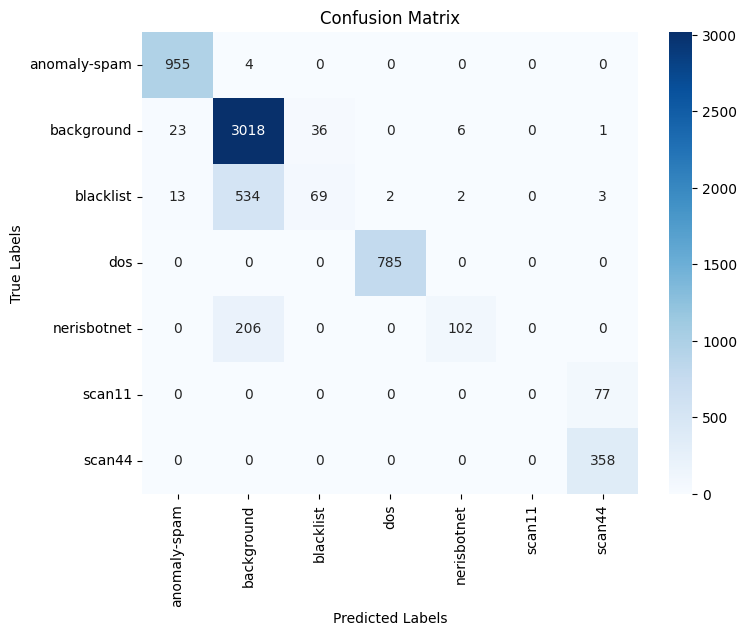

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a function to convert IP addresses from dot-decimal notation to integers
def ip_to_int(ip):
    parts = ip.split('.')
    return (int(parts[0]) * 256**3) + (int(parts[1]) * 256**2) + (int(parts[2]) * 256) + int(parts[3])

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv')

# Apply IP conversion function to 'source_ip' and 'destination_ip'
data['source_ip'] = data['source_ip'].apply(ip_to_int)
data['destination_ip'] = data['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'forwarding_status', 'tos', 'packets', 'bytes']

# Split data into features and target
X = data[numerical_features + categorical_features]
y = data['label']

# Define the encoder for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_encoded = encoder.transform(X_test[categorical_features]).toarray()

# Combine scaled numerical features with encoded categorical features
X_train_processed = np.concatenate((X_train[numerical_features].values, X_train_encoded), axis=1)
X_test_processed = np.concatenate((X_test[numerical_features].values, X_test_encoded), axis=1)

# Define the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train_processed.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(data['label'])), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_processed, y_train, epochs=15, batch_size=32, validation_data=(X_test_processed, y_test))

# Define the new sample
new_sample = {
    'duration': 0.584,
    'source_ip': '193.27.6.136',
    'destination_ip': '42.219.156.212',
    'source_port': 25,
    'destination_port': 57784,
    'forwarding_status': 0,
    'tos': 0,
    'packets': 5,
    'bytes': 958,
    'protocol': 'TCP',
    'flag': '.AP.SF'
}

# Convert new sample to a DataFrame
new_sample_df = pd.DataFrame([new_sample])

# Apply IP conversion function to 'source_ip' and 'destination_ip'
new_sample_df['source_ip'] = new_sample_df['source_ip'].apply(ip_to_int)
new_sample_df['destination_ip'] = new_sample_df['destination_ip'].apply(ip_to_int)

# Scale numerical features
new_sample_df[numerical_features] = scaler.transform(new_sample_df[numerical_features])

# One-hot encode categorical features
new_sample_encoded = encoder.transform(new_sample_df[categorical_features]).toarray()

# Combine scaled numerical features with encoded categorical features
new_sample_processed = np.concatenate((new_sample_df[numerical_features].values, new_sample_encoded), axis=1)

# Predict the class of the new sample
# Predict the probabilities of each class for the new sample
predicted_probabilities = model.predict(new_sample_processed)

# Determine the class label with the highest probability
predicted_class_label_index = np.argmax(predicted_probabilities)
predicted_class_label = label_encoder.inverse_transform([predicted_class_label_index])[0]

print(f"Predicted class label: {predicted_class_label}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

## Predict labels for the test data
y_pred = np.argmax(model.predict(X_test_processed), axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
